In [1]:
import math as mt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns


### Project Overview
In the new product introduction experiment, I am trying to determine the potential sale if the new product(candy) is introduced. I designed the experiment by putting new product up for sale in a few stores and observe the results. 
- Treatment: sell the new product
- Unit: each store(candy store)

### Goal: Define Control variables and Experimental variable 
The main purpose of the control variables is to make sure that I have a good match between treatment and control units. So that the comparison being made in the experiment is a good one.
The list of possible variables to control can be very long. How do I know which variables are truly important to control? 

#### Step 1. List potential variables 
- Number of products offered
- Total volume of category sold
- Number of customers
- Number of competitive products 
- Size (of the store) 
- Location (of the store)
- Demographics of shoppers

#### Step 2. Is variable data available?
- Hard to get "Number of customers" --> not available
- The company may know the "Number of competitive products" in general, but not which ones are sold at each store --> not available

#### Step 3. Make sure the connection between the target variable and each control variable is logical.
The remaining variables are all logically connected to store sales. However in this case, "location" and " demographics of shoppers" are likely measureing the same thing. Location may encompass many demographic variables. So I eliminated "Demographics of shoppers." <br>
Now the remaining variables are: 
- Number of products offered (Product count)
- Total volume of category sold (Category Sales)
- Size (of the store) 
- Location (of the store)

#### Step 4. Test correlation between control and target variables.


In [2]:
data = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/AB_testing_project/newproductcontroldata.csv')
data

,Store ID,City,State,Zip Code,Category Sales,Product Count,Size
0,1,ALABASTER,AL,35007,18.88,1,Large
1,2,BIRMINGHAM,AL,35209,44125.66,6,Large
2,3,DECATUR,AL,35601,46627.92,5,Large
3,4,HUNTSVILLE,AL,35806,26658.48,6,Large
4,5,MOBILE,AL,36606,1863.60,3,Large
5,6,MOBILE,AL,36606,6772.51,4,Large
6,7,TRUSSVILLE,AL,35235,14354.16,4,Large
7,8,TUSCALOOSA,AL,35405,827.80,5,Large
8,9,PARAGOULD,AR,72450,844.60,5,Large
9,10,BROOKSVILLE,FL,34613,723.12,4,Large


##### Product count & Sales

In [3]:
data['Product Count'].corr(data['Category Sales'])

0.43188129524145225

We can see that category sales is fairly positively correlated with product count, with correlation coefficient of 0.43. This is evidence that product count should be controlled in the experiment since sale is related to the number of products offered at the stores.

##### Store Size & Sales 

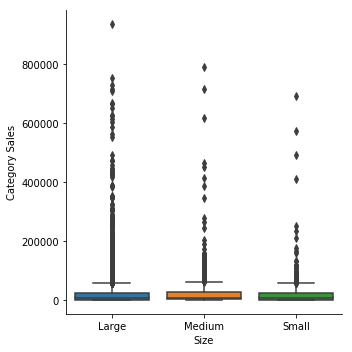

In [4]:
sns.catplot(x="Size", y="Category Sales", kind="box", data=data);

Since "Size" is categorical data, I decided to visualize the relation between these two variables. If there was a correlation between the size and sales, I would expect to see a more linear relationship. However, in this chart, there doesn't appear to be a pattern that correlates the size of the stores with sales, so I don't need to control for store size in our experiment.

##### Location & Sales 
I would like to know how many stores we have in a specific geography so that I can determine if I can use that as a control variable. 

In [5]:
#data.groupby("Zip Code").count()
#data.groupby("City").count()
data.groupby("State").count()

,Store ID,City,Zip Code,Category Sales,Product Count,Size
State,,,,,,
AL,22,22,22,22,22,22
AR,7,7,7,7,7,7
FL,25,25,25,25,25,25
GA,45,45,45,45,45,45
KY,6,6,6,6,6,6
LA,5,5,5,5,5,5
MD,2,2,2,2,2,2
MO,1,1,1,1,1,1
MS,16,16,16,16,16,16


The data shows that most city, state zip code combinations only have one store. There are too few stores in each group to have options to control on. Same results for group by city. Its more ideal to have at least 30( or some people say 15) observations for each group to run a T test. If we group only by state, we can get a much larger number of stores per state. <br>
I assumed that stores in the same state perform more alike than stores in different states(see below calculation). Therefore, since we have enough stores per state, I should control for state.

In [14]:
data.groupby(['State'])['Category Sales'].mean()

State
 AL    19058.058636
 AR     1152.892857
 FL    22743.059200
 GA    16453.948222
 KY    14842.206667
 LA     2482.510000
 MD     2168.720000
 MO     3166.800000
 MS    14260.650625
 NC    28414.380455
 OK     7014.830000
 SC    46625.639444
 TN    26829.427083
 TX     4207.950000
 VA     3903.398947
 WV    11900.337500
AK      5784.995385
AL     10643.694955
AR     21996.505833
AZ     23482.813497
CA     18159.316627
CO     24387.956686
CT     16329.518947
DC     18269.539615
DE     11978.026667
FL     33234.677612
GA     15858.871911
HI     22645.950000
IA     21828.565753
ID     13879.650385
           ...     
ME     44707.208400
MI     18826.275500
MN     27590.738717
MO     42093.002547
MS     35982.593158
MT      8850.561429
NC     24601.673080
ND     30136.165000
NE     23351.487255
NH      9090.503333
NJ     28650.909907
NM     19663.311667
NV     13946.492308
NY     23196.764858
OH     27789.147851
OK     15409.238625
OR     43543.132717
PA     30310.896828
RI     21669.0

##### Conclusion: There is no hard rule for the number of control variables. But having too many control variables is usually worse for an experiment than having too few. For now, I decide to chose "Product count" and "State of store" as control variables. And "Category Sales" is target variable.

#### Step 5. Test correlation between other correlation variables to avoid similar variable.
Lurking variable (also called Confounding variable) is the variable that highly correlated with both target variable and another control variable. This can cause us to overweight a control variable or include the control variable that really isn't important. <br>
In this case, since "location" is a categorical data, there is no way to do the correlation test. But from visual observation(below summary), I don't see any trend between location and product count.

In [15]:
data.groupby(['State'])['Product Count'].mean()

State
 AL    4.863636
 AR    3.857143
 FL    4.840000
 GA    4.933333
 KY    5.666667
 LA    4.600000
 MD    4.500000
 MO    6.000000
 MS    5.062500
 NC    5.227273
 OK    6.000000
 SC    5.666667
 TN    4.666667
 TX    4.200000
 VA    4.421053
 WV    4.250000
AK     4.769231
AL     4.882883
AR     5.450000
AZ     5.142077
CA     4.989047
CO     5.142857
CT     4.912281
DC     5.307692
DE     5.133333
FL     5.134694
GA     4.968889
HI     5.692308
IA     5.315068
ID     4.807692
         ...   
ME     5.560000
MI     5.175000
MN     5.203209
MO     5.009434
MS     5.342105
MT     5.071429
NC     5.121673
ND     5.700000
NE     5.254902
NH     4.939394
NJ     5.233645
NM     5.388889
NV     4.865385
NY     5.136792
OH     4.947368
OK     4.675000
OR     5.076087
PA     5.172043
RI     4.400000
SC     4.651685
SD     5.533333
TN     4.724138
TX     4.986063
UT     4.948052
VA     5.119835
VT     4.750000
WA     5.281250
WI     5.299320
WV     5.255814
WY     5.461538
Name: Product Coun